# ****Model Evaluation with Comparative Analysis****

In [1]:
import joblib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    roc_curve, roc_auc_score, precision_recall_curve, average_precision_score,
    recall_score, precision_score, f1_score
)
from sklearn.model_selection import train_test_split
import os

sns.set_theme(style="whitegrid")

# Paths
BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), '..', '..'))
DATA_PATH = os.path.join(BASE_DIR, 'stroke-prediction-project', 'data', 'processed', 'cleaned_dataset.csv')
REPORT_DIR = os.path.join(BASE_DIR, 'stroke-prediction-project', 'reports')
os.makedirs(REPORT_DIR, exist_ok=True)

In [2]:
# Load and prepare data
df = pd.read_csv(DATA_PATH)
X = df.drop(columns=['stroke'])
y = df['stroke']

In [3]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_temp, y_temp, test_size=0.25, stratify=y_temp, random_state=42)

1. **k-NN Classifier Model**


                 KNN VALIDATION PERFORMANCE                 
Validation Accuracy: 0.8151
Validation ROC AUC: 0.9425
Validation Avg Precision: 0.5477
Precision: 0.1965
Recall (Sensitivity): 0.9000
Specificity: 0.8107
F1 Score: 0.3226

Validation Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.99      0.81      0.89       972
      Stroke       0.20      0.90      0.32        50

    accuracy                           0.82      1022
   macro avg       0.60      0.86      0.61      1022
weighted avg       0.95      0.82      0.87      1022


             KNN MODEL PERFORMANCE ON TEST SET              
Test Accuracy: 0.8474
Precision: 0.2323
Recall (Sensitivity): 0.9200
Specificity: 0.8436
F1 Score: 0.3710
ROC AUC Score: 0.9561
Average Precision Score: 0.6635

Detailed Classification Report:
              precision    recall  f1-score   support

   No Stroke       1.00      0.84      0.91       972
      Stroke       0.23      0.92      0

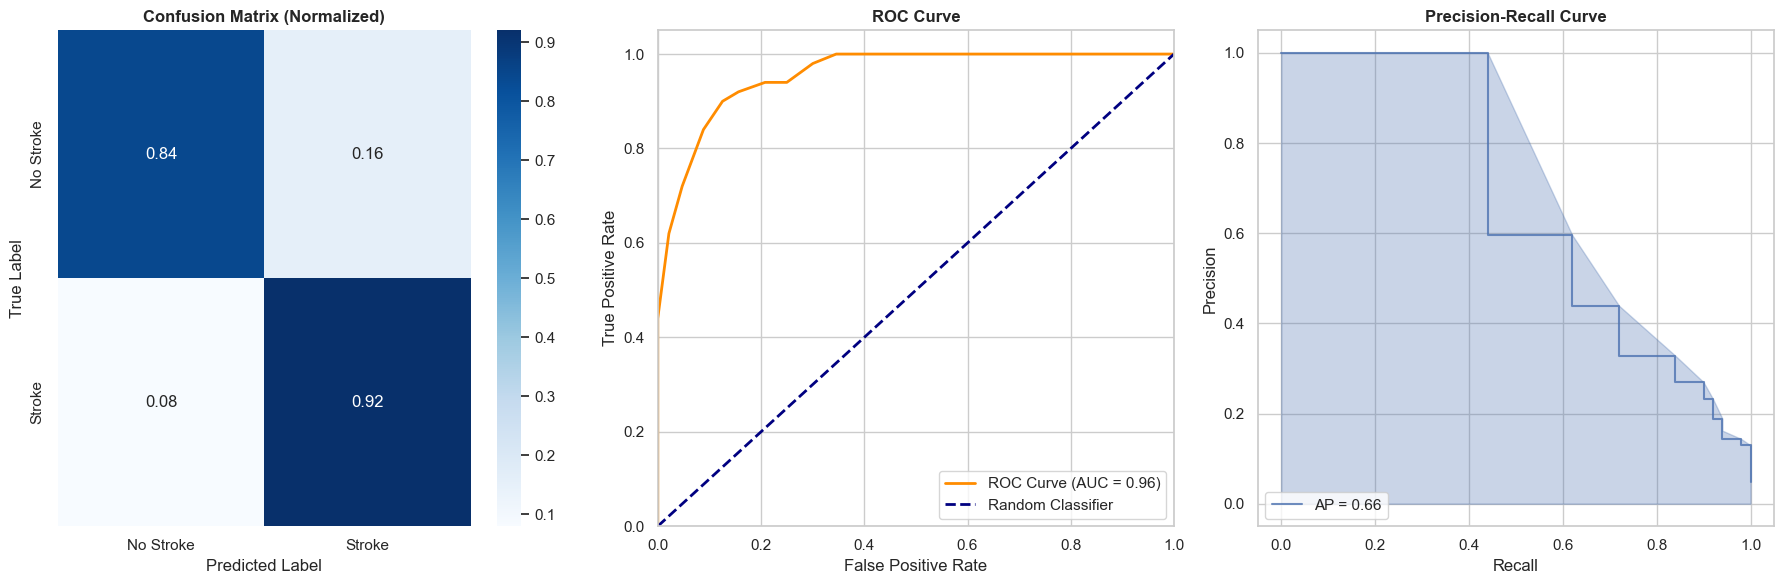

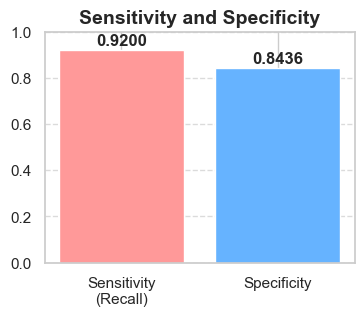

In [23]:
MODEL_PATH = os.path.join(BASE_DIR, 'stroke-prediction-project', 'src', 'models', 'knn_model.pkl')

def print_header(text):
    print("\n" + "=" * 60)
    print(text.center(60))
    print("=" * 60)

def calc_sens_spec(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity, specificity


# Step 1: Load model
knn_model = joblib.load(MODEL_PATH)

# Step 2: Validation evaluation
print_header("KNN VALIDATION PERFORMANCE")

y_val_pred = knn_model.predict(X_valid)
y_val_proba = knn_model.predict_proba(X_valid)[:, 1]

val_accuracy = accuracy_score(y_valid, y_val_pred)
val_roc_auc = roc_auc_score(y_valid, y_val_proba)
val_avg_precision = average_precision_score(y_valid, y_val_proba)
val_precision = precision_score(y_valid, y_val_pred)
val_recall = recall_score(y_valid, y_val_pred)
val_f1 = f1_score(y_valid, y_val_pred)
val_sens, val_spec = calc_sens_spec(y_valid, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation ROC AUC: {val_roc_auc:.4f}")
print(f"Validation Avg Precision: {val_avg_precision:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall (Sensitivity): {val_recall:.4f}")
print(f"Specificity: {val_spec:.4f}")
print(f"F1 Score: {val_f1:.4f}")

print("\nValidation Classification Report:")
print(classification_report(y_valid, y_val_pred, target_names=["No Stroke", "Stroke"]))

# Step 3: Test evaluation
print_header("KNN MODEL PERFORMANCE ON TEST SET")

y_pred = knn_model.predict(X_test)
y_proba = knn_model.predict_proba(X_test)[:, 1]

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
sensitivity, specificity = calc_sens_spec(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"]))

# Visualizations
plt.figure(figsize=(18, 6))

# Confusion Matrix (Normalized)
plt.subplot(131)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title('Confusion Matrix (Normalized)', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC Curve
plt.subplot(132)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label="Random Classifier")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve', fontsize=12, fontweight='bold')
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(133)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
plt.step(recall_curve, precision_curve, color='b', alpha=0.8, where='post', label=f'AP = {avg_precision:.2f}')
plt.fill_between(recall_curve, precision_curve, alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve', fontsize=12, fontweight='bold')
plt.legend(loc="lower left")

plt.tight_layout()
report_path = os.path.join(REPORT_DIR, 'knn_performance_overview.png')
plt.savefig(report_path, dpi=300)
print(f"\nPerformance visualization saved to:\n   {report_path}")

# Sensitivity and Specificity Bar Plot
plt.figure(figsize=(4, 3))
metrics = ['Sensitivity\n(Recall)', 'Specificity']
values = [sensitivity, specificity]
colors = ['#ff9999', '#66b3ff']

plt.bar(metrics, values, color=colors)
plt.ylim(0, 1.0)
plt.title('Sensitivity and Specificity', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

sens_spec_path = os.path.join(REPORT_DIR, 'knn_sensitivity_specificity.png')
plt.savefig(sens_spec_path, dpi=300)
print(f"\nSensitivity and Specificity visualization saved to:\n   {sens_spec_path}")


**Best Parameters:** {'feature_selection__k': 8, 'knn__metric': 'manhattan', 'knn__n_neighbors': 11, 'knn__weights': 'uniform'}  
**Best ROC AUC Score:** 0.7797

2. **Bayesian Learning (Gaussian Naive Bayes) Model**


              BAYESIAN VALIDATION PERFORMANCE               
Validation Accuracy: 0.7730
Validation ROC AUC: 0.8390
Validation Avg Precision: 0.1850
Precision: 0.1445
Recall (Sensitivity): 0.7400
Specificity: 0.7747
F1 Score: 0.2418

Validation Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.98      0.77      0.87       972
      Stroke       0.14      0.74      0.24        50

    accuracy                           0.77      1022
   macro avg       0.56      0.76      0.55      1022
weighted avg       0.94      0.77      0.84      1022


           BAYESIAN MODEL PERFORMANCE ON TEST SET           
Test Accuracy: 0.7671
Precision: 0.1466
Recall (Sensitivity): 0.7800
Specificity: 0.7665
F1 Score: 0.2468
ROC AUC Score: 0.8219
Average Precision Score: 0.1903

Detailed Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.99      0.77      0.86       972
      Stroke       0.15      0.78      0

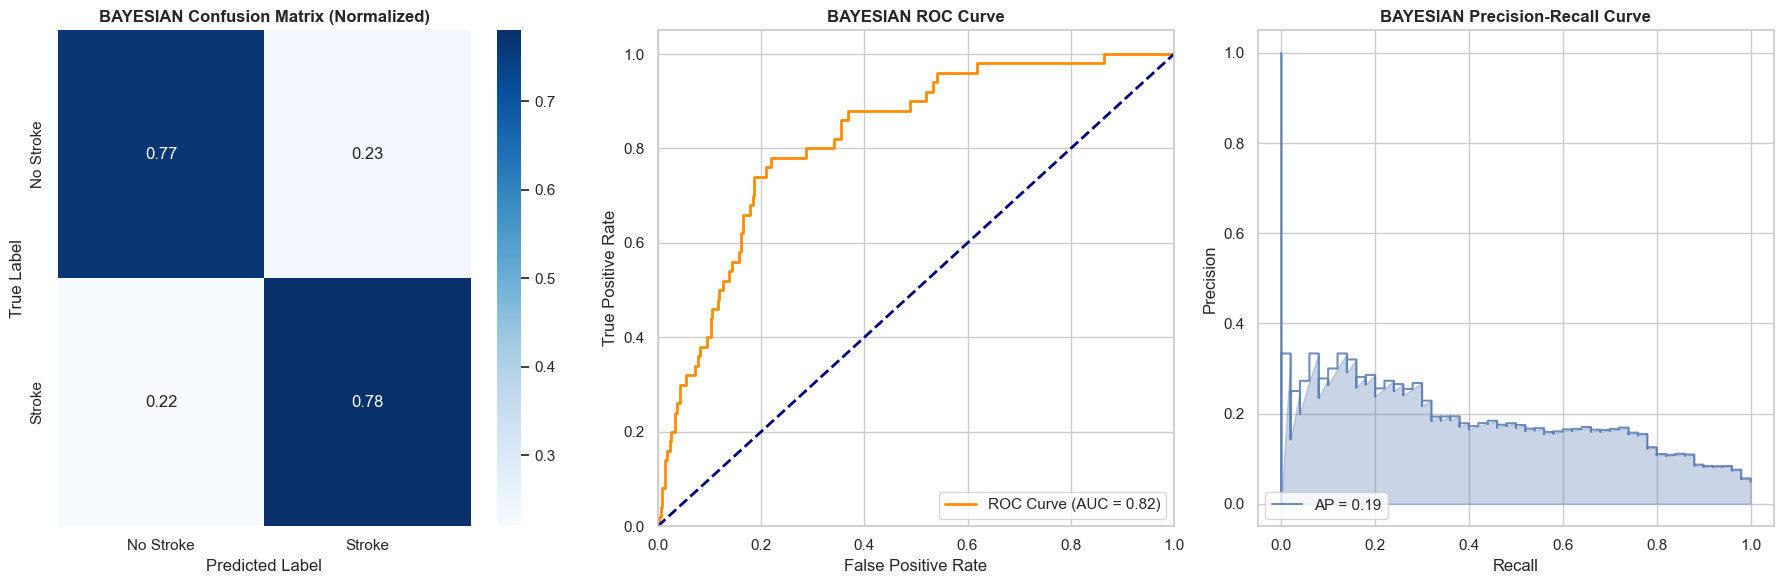

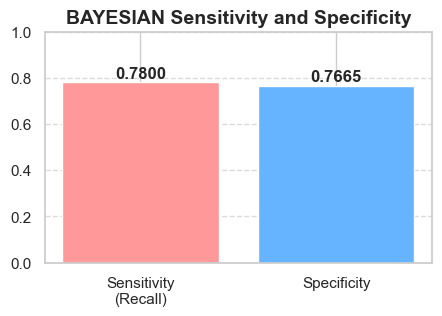

In [ ]:
MODEL_PATH = os.path.join(BASE_DIR, 'stroke-prediction-project', 'src', 'models', 'bayesian_model.pkl')

# Load model
model = joblib.load(MODEL_PATH)
model_name = os.path.basename(MODEL_PATH).split("_")[0].upper()

# Validation Evaluation
print_header(f"{model_name} VALIDATION PERFORMANCE")

y_val_pred = model.predict(X_valid)
y_val_proba = model.predict_proba(X_valid)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_valid)

val_accuracy = accuracy_score(y_valid, y_val_pred)
val_roc_auc = roc_auc_score(y_valid, y_val_proba)
val_avg_precision = average_precision_score(y_valid, y_val_proba)
val_precision = precision_score(y_valid, y_val_pred)
val_recall = recall_score(y_valid, y_val_pred)
val_f1 = f1_score(y_valid, y_val_pred)
val_sens, val_spec = calc_sens_spec(y_valid, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation ROC AUC: {val_roc_auc:.4f}")
print(f"Validation Avg Precision: {val_avg_precision:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall (Sensitivity): {val_recall:.4f}")
print(f"Specificity: {val_spec:.4f}")
print(f"F1 Score: {val_f1:.4f}")

print("\nValidation Classification Report:")
print(classification_report(y_valid, y_val_pred, target_names=["No Stroke", "Stroke"]))

# Test Evaluation
print_header(f"{model_name} MODEL PERFORMANCE ON TEST SET")

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
sensitivity, specificity = calc_sens_spec(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"]))


# Visualizations
plt.figure(figsize=(18, 6))

# Confusion Matrix - Normalized
plt.subplot(131)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title(f'{model_name} Confusion Matrix (Normalized)', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC Curve
plt.subplot(132)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{model_name} ROC Curve', fontsize=12, fontweight='bold')
plt.legend(loc="lower right")

# PR Curve
plt.subplot(133)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
plt.step(recall_curve, precision_curve, color='b', alpha=0.8, where='post', label=f'AP = {avg_precision:.2f}')
plt.fill_between(recall_curve, precision_curve, alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'{model_name} Precision-Recall Curve', fontsize=12, fontweight='bold')
plt.legend(loc="lower left")

plt.tight_layout()
overview_path = os.path.join(REPORT_DIR, f'{model_name.lower()}_performance_overview.png')
plt.savefig(overview_path, dpi=300)
print(f"\nPerformance visualization saved to:\n   {overview_path}")


# Sensitivity & Specificity Plot
plt.figure(figsize=(5, 3))
metrics = ['Sensitivity\n(Recall)', 'Specificity']
values = [sensitivity, specificity]
colors = ['#ff9999', '#66b3ff']

plt.bar(metrics, values, color=colors)
plt.ylim(0, 1.0)
plt.title(f'{model_name} Sensitivity and Specificity', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

sens_spec_path = os.path.join(REPORT_DIR, f'{model_name.lower()}_sensitivity_specificity.png')
plt.savefig(sens_spec_path, dpi=300)
print(f"Sensitivity and Specificity visualization saved to:\n   {sens_spec_path}")


**Best Parameters:** {'feature_selection__k': 8, 'gnb__var_smoothing': 1e-08}  
**Best f1 Score:** 0.2301

3. **Single/Support Vector Machine (SVM) Model**


                 SVM VALIDATION PERFORMANCE                 
Validation Accuracy: 0.7720
Validation ROC AUC: 0.8622
Validation Avg Precision: 0.2130
Precision: 0.1547
Recall (Sensitivity): 0.8200
Specificity: 0.7695
F1 Score: 0.2603

Validation Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.99      0.77      0.87       972
      Stroke       0.15      0.82      0.26        50

    accuracy                           0.77      1022
   macro avg       0.57      0.79      0.56      1022
weighted avg       0.95      0.77      0.84      1022


             SVM MODEL PERFORMANCE ON TEST SET              
Test Accuracy: 0.7867
Precision: 0.1613
Recall (Sensitivity): 0.8000
Specificity: 0.7860
F1 Score: 0.2685
ROC AUC Score: 0.8745
Average Precision Score: 0.3042

Detailed Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.99      0.79      0.88       972
      Stroke       0.16      0.80      0

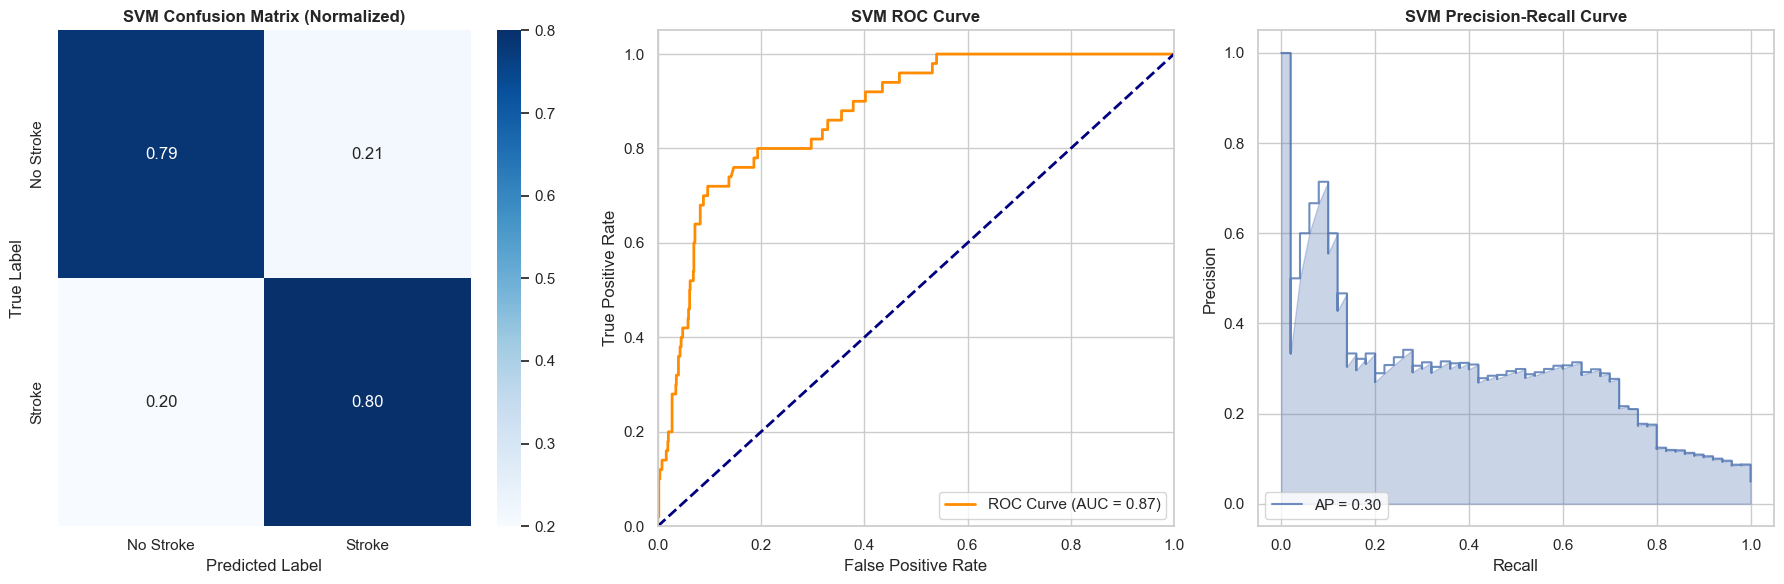

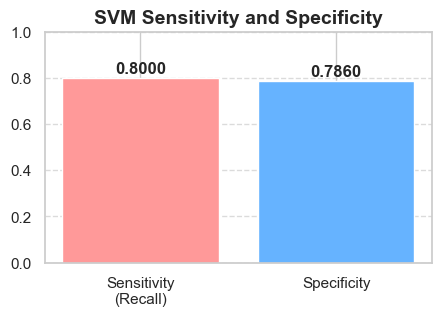

In [ ]:
MODEL_PATH = os.path.join(BASE_DIR, 'stroke-prediction-project', 'src', 'models', 'svm_model.pkl')
# Load model
model = joblib.load(MODEL_PATH)
model_name = os.path.basename(MODEL_PATH).split("_")[0].upper()

# Validation Evaluation
print_header(f"{model_name} VALIDATION PERFORMANCE")

y_val_pred = model.predict(X_valid)
y_val_proba = model.predict_proba(X_valid)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_valid)

val_accuracy = accuracy_score(y_valid, y_val_pred)
val_roc_auc = roc_auc_score(y_valid, y_val_proba)
val_avg_precision = average_precision_score(y_valid, y_val_proba)
val_precision = precision_score(y_valid, y_val_pred)
val_recall = recall_score(y_valid, y_val_pred)
val_f1 = f1_score(y_valid, y_val_pred)
val_sens, val_spec = calc_sens_spec(y_valid, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation ROC AUC: {val_roc_auc:.4f}")
print(f"Validation Avg Precision: {val_avg_precision:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall (Sensitivity): {val_recall:.4f}")
print(f"Specificity: {val_spec:.4f}")
print(f"F1 Score: {val_f1:.4f}")

print("\nValidation Classification Report:")
print(classification_report(y_valid, y_val_pred, target_names=["No Stroke", "Stroke"]))

# Test Evaluation
print_header(f"{model_name} MODEL PERFORMANCE ON TEST SET")

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
sensitivity, specificity = calc_sens_spec(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"]))


# Visualizations
plt.figure(figsize=(18, 6))

# Confusion Matrix - Normalized
plt.subplot(131)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title(f'{model_name} Confusion Matrix (Normalized)', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC Curve
plt.subplot(132)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{model_name} ROC Curve', fontsize=12, fontweight='bold')
plt.legend(loc="lower right")

# PR Curve
plt.subplot(133)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
plt.step(recall_curve, precision_curve, color='b', alpha=0.8, where='post', label=f'AP = {avg_precision:.2f}')
plt.fill_between(recall_curve, precision_curve, alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'{model_name} Precision-Recall Curve', fontsize=12, fontweight='bold')
plt.legend(loc="lower left")

plt.tight_layout()
overview_path = os.path.join(REPORT_DIR, f'{model_name.lower()}_performance_overview.png')
plt.savefig(overview_path, dpi=300)
print(f"\nPerformance visualization saved to:\n   {overview_path}")


# Sensitivity & Specificity Plot
plt.figure(figsize=(5, 3))
metrics = ['Sensitivity\n(Recall)', 'Specificity']
values = [sensitivity, specificity]
colors = ['#ff9999', '#66b3ff']

plt.bar(metrics, values, color=colors)
plt.ylim(0, 1.0)
plt.title(f'{model_name} Sensitivity and Specificity', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

sens_spec_path = os.path.join(REPORT_DIR, f'{model_name.lower()}_sensitivity_specificity.png')
plt.savefig(sens_spec_path, dpi=300)
print(f"Sensitivity and Specificity visualization saved to:\n   {sens_spec_path}")


4. **Logistic Regression Model**


           LOGISTIC MODEL VALIDATION PERFORMANCE            
Validation Accuracy: 0.7358
Validation ROC AUC: 0.8455
Precision: 0.1333
Recall (Sensitivity): 0.8000
Specificity: 0.7325
F1 Score: 0.2286

Validation Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.99      0.73      0.84       972
      Stroke       0.13      0.80      0.23        50

    accuracy                           0.74      1022
   macro avg       0.56      0.77      0.53      1022
weighted avg       0.94      0.74      0.81      1022


           LOGISTIC MODEL PERFORMANCE ON TEST SET           
Test Accuracy: 0.7476
Precision: 0.1414
Recall (Sensitivity): 0.8200
Specificity: 0.7438
F1 Score: 0.2412
ROC AUC Score: 0.8478
Average Precision Score: 0.2558

Detailed Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.99      0.74      0.85       972
      Stroke       0.14      0.82      0.24        50

    accuracy      

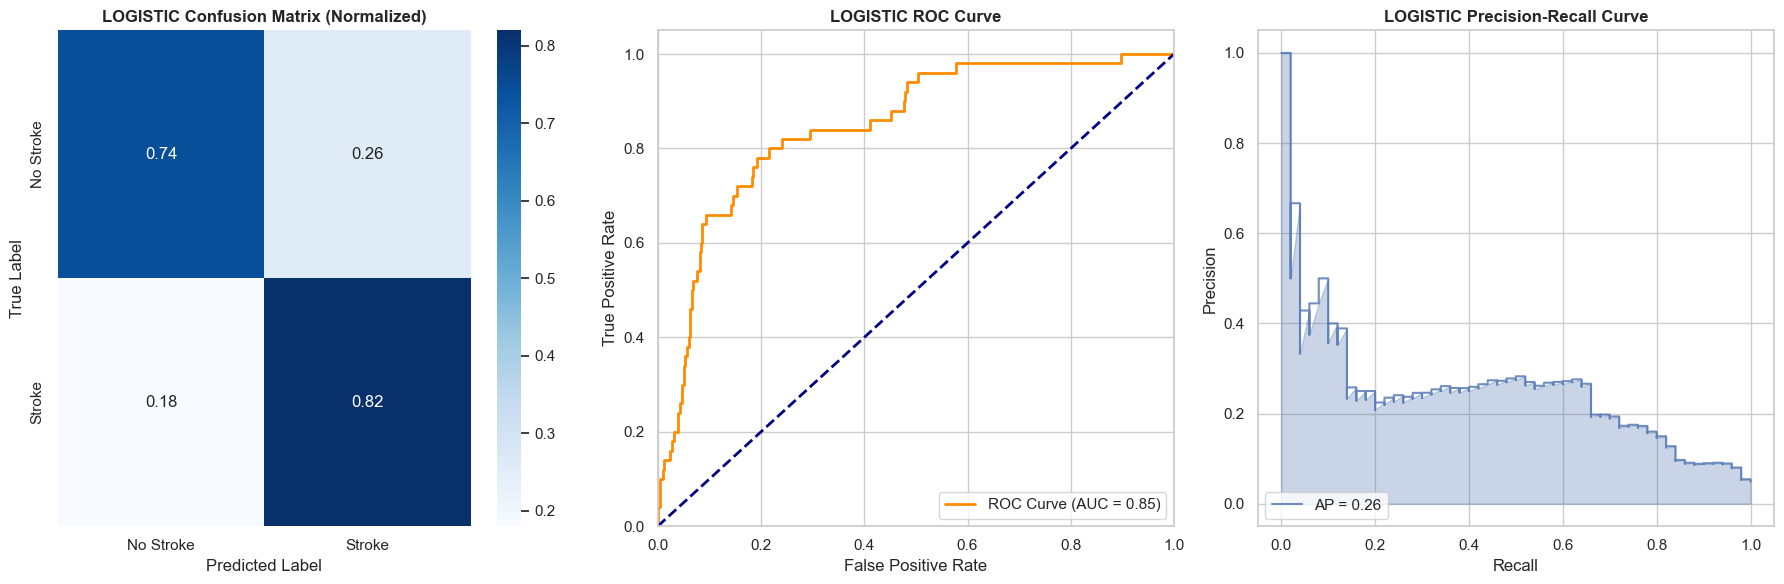

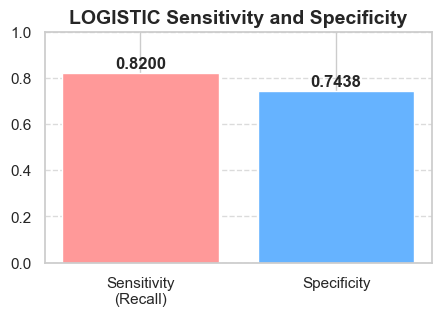

In [ ]:
MODEL_PATH = os.path.join(BASE_DIR, 'stroke-prediction-project', 'src', 'models', 'logistic_regression_model.pkl')


# Load model:
model = joblib.load(MODEL_PATH)
model_name = os.path.basename(MODEL_PATH).split("_")[0].upper()


try:
    y_val_pred = model.predict(X_valid)
    y_val_proba = model.predict_proba(X_valid)[:, 1]
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
except Exception as e:
    print(f"Error during prediction: {e}")
    exit(1)

# Validation evaluation
print_header(f"{model_name} MODEL VALIDATION PERFORMANCE")

val_accuracy = accuracy_score(y_valid, y_val_pred)
val_roc_auc = roc_auc_score(y_valid, y_val_proba)
val_precision = precision_score(y_valid, y_val_pred)
val_recall = recall_score(y_valid, y_val_pred)
val_f1 = f1_score(y_valid, y_val_pred)
val_sens, val_spec = calc_sens_spec(y_valid, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation ROC AUC: {val_roc_auc:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall (Sensitivity): {val_recall:.4f}")
print(f"Specificity: {val_spec:.4f}")
print(f"F1 Score: {val_f1:.4f}")

print("\nValidation Classification Report:")
print(classification_report(y_valid, y_val_pred, target_names=["No Stroke", "Stroke"]))

print_header(f"{model_name} MODEL PERFORMANCE ON TEST SET")

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
sensitivity, specificity = calc_sens_spec(y_test, y_pred)

# Test Evaluation:
print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"]))

if y_proba is not None:
    plt.figure(figsize=(18, 6))

    plt.subplot(131)
    cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=['No Stroke', 'Stroke'],
                yticklabels=['No Stroke', 'Stroke'])
    plt.title(f'{model_name} Confusion Matrix (Normalized)', fontsize=12, fontweight='bold')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')

    plt.subplot(132)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'{model_name} ROC Curve', fontsize=12, fontweight='bold')
    plt.legend(loc="lower right")

    plt.subplot(133)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
    plt.step(recall_curve, precision_curve, color='b', alpha=0.8, where='post', label=f'AP = {avg_precision:.2f}')
    plt.fill_between(recall_curve, precision_curve, alpha=0.3, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'{model_name} Precision-Recall Curve', fontsize=12, fontweight='bold')
    plt.legend(loc="lower left")

    plt.tight_layout()
    os.makedirs(REPORT_DIR, exist_ok=True)
    overview_path = os.path.join(REPORT_DIR, f'{model_name.lower()}_performance_overview.png')
    plt.savefig(overview_path, dpi=300)
    print(f"\nPerformance visualization saved to:\n   {overview_path}")

    plt.figure(figsize=(5, 3))
    metrics = ['Sensitivity\n(Recall)', 'Specificity']
    values = [sensitivity, specificity]
    colors = ['#ff9999', '#66b3ff']

    plt.bar(metrics, values, color=colors)
    plt.ylim(0, 1.0)
    plt.title(f'{model_name} Sensitivity and Specificity', fontsize=14, fontweight='bold')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    for i, v in enumerate(values):
        plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

    sens_spec_path = os.path.join(REPORT_DIR, f'{model_name.lower()}_sensitivity_specificity.png')
    plt.savefig(sens_spec_path, dpi=300)
    print(f"Sensitivity and Specificity visualization saved to:\n   {sens_spec_path}")

*Fitting 10 folds for each of 48 candidates, totalling 480 fits.*  
**Best parameters:** {'classifier__C': np.float64(0.001), 'classifier__class_weight': {0: 1, 1: 10},  'classifier__penalty': 'l2', 'classifier__solver': 'liblinear', 'dim_reduction__n_components': 0.99}  
**Optimal classification threshold:** 0.50

5. **Decision Tree Model**


              DECISION VALIDATION PERFORMANCE               
Validation Accuracy: 0.8845
Validation ROC AUC: 0.8883
Validation Avg Precision: 0.2794
Precision: 0.2258
Recall (Sensitivity): 0.5600
Specificity: 0.9012
F1 Score: 0.3218

Validation Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.98      0.90      0.94       972
      Stroke       0.23      0.56      0.32        50

    accuracy                           0.88      1022
   macro avg       0.60      0.73      0.63      1022
weighted avg       0.94      0.88      0.91      1022


           DECISION MODEL PERFORMANCE ON TEST SET           
Test Accuracy: 0.8865
Precision: 0.2422
Recall (Sensitivity): 0.6200
Specificity: 0.9002
F1 Score: 0.3483
ROC AUC Score: 0.9111
Average Precision Score: 0.3527

Detailed Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.98      0.90      0.94       972
      Stroke       0.24      0.62      0

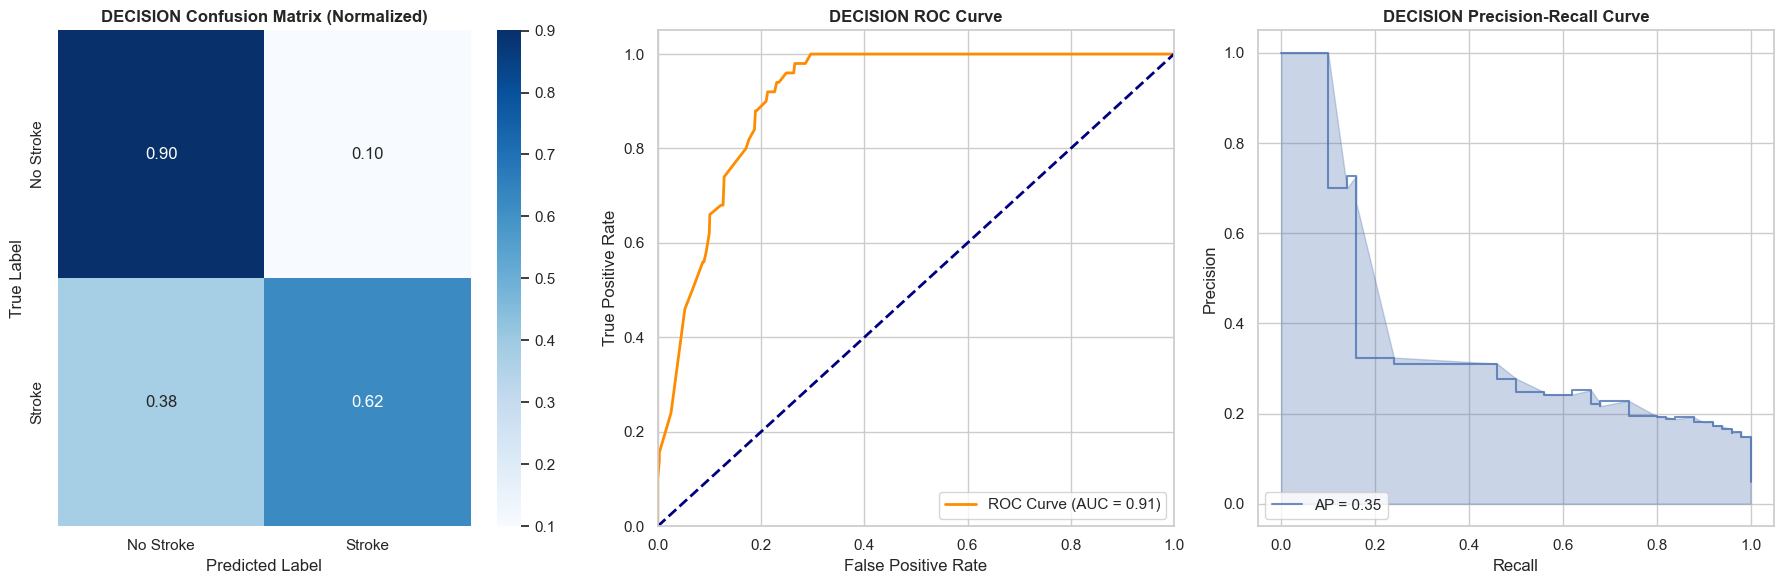

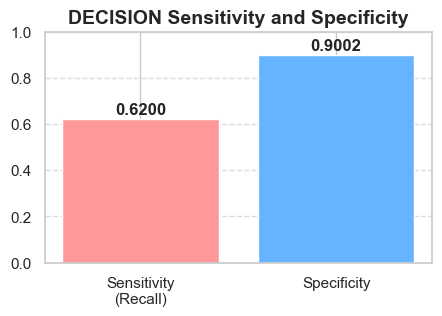

In [ ]:
import os
# Replace model file path for Decision Tree
MODEL_PATH = os.path.join(BASE_DIR, 'stroke-prediction-project', 'src', 'models', 'decision_tree_model.pkl')

# Load model
model = joblib.load(MODEL_PATH)
model_name = os.path.basename(MODEL_PATH).split("_")[0].upper()

# Validation Evaluation
print_header(f"{model_name} VALIDATION PERFORMANCE")

y_val_pred = model.predict(X_valid)
y_val_proba = model.predict_proba(X_valid)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_valid)

val_accuracy = accuracy_score(y_valid, y_val_pred)
val_roc_auc = roc_auc_score(y_valid, y_val_proba)
val_avg_precision = average_precision_score(y_valid, y_val_proba)
val_precision = precision_score(y_valid, y_val_pred)
val_recall = recall_score(y_valid, y_val_pred)
val_f1 = f1_score(y_valid, y_val_pred)
val_sens, val_spec = calc_sens_spec(y_valid, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation ROC AUC: {val_roc_auc:.4f}")
print(f"Validation Avg Precision: {val_avg_precision:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall (Sensitivity): {val_recall:.4f}")
print(f"Specificity: {val_spec:.4f}")
print(f"F1 Score: {val_f1:.4f}")

print("\nValidation Classification Report:")
print(classification_report(y_valid, y_val_pred, target_names=["No Stroke", "Stroke"]))

# Test Evaluation
print_header(f"{model_name} MODEL PERFORMANCE ON TEST SET")

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
sensitivity, specificity = calc_sens_spec(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")

print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"]))

# Visualizations
plt.figure(figsize=(18, 6))

# Confusion Matrix - Normalized
plt.subplot(131)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title(f'{model_name} Confusion Matrix (Normalized)', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC Curve
plt.subplot(132)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{model_name} ROC Curve', fontsize=12, fontweight='bold')
plt.legend(loc="lower right")

# PR Curve
plt.subplot(133)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
plt.step(recall_curve, precision_curve, color='b', alpha=0.8, where='post', label=f'AP = {avg_precision:.2f}')
plt.fill_between(recall_curve, precision_curve, alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'{model_name} Precision-Recall Curve', fontsize=12, fontweight='bold')
plt.legend(loc="lower left")

plt.tight_layout()
overview_path = os.path.join(REPORT_DIR, f'{model_name.lower()}_performance_overview.png')
plt.savefig(overview_path, dpi=300)
print(f"\nPerformance visualization saved to:\n   {overview_path}")

# Sensitivity & Specificity Plot
plt.figure(figsize=(5, 3))
metrics = ['Sensitivity\n(Recall)', 'Specificity']
values = [sensitivity, specificity]
colors = ['#ff9999', '#66b3ff']

plt.bar(metrics, values, color=colors)
plt.ylim(0, 1.0)
plt.title(f'{model_name} Sensitivity and Specificity', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

sens_spec_path = os.path.join(REPORT_DIR, f'{model_name.lower()}_sensitivity_specificity.png')
plt.savefig(sens_spec_path, dpi=300)
print(f"Sensitivity and Specificity visualization saved to:\n   {sens_spec_path}")


*Fitting 5 folds for each of 120 candidates, totalling 600 fits.*  
**Best Parameters:** {'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__min_samples_split': 5,  'feature_selection__k': 8}  
**Best F1 Score:** 0.2423

6. **Artificial Neural Network (ANN) / Multi-Level Perceptron (MLP)**


                 ANN VALIDATION PERFORMANCE                 
Validation Accuracy: 0.7652
Validation ROC AUC: 0.8556
Validation Avg Precision: 0.1980
Precision: 0.1429
Recall (Sensitivity): 0.7600
Specificity: 0.7654
F1 Score: 0.2405

Validation Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.98      0.77      0.86       972
      Stroke       0.14      0.76      0.24        50

    accuracy                           0.77      1022
   macro avg       0.56      0.76      0.55      1022
weighted avg       0.94      0.77      0.83      1022


             ANN MODEL PERFORMANCE ON TEST SET              
Test Accuracy: 0.7720
Precision: 0.1547
Recall (Sensitivity): 0.8200
Specificity: 0.7695
F1 Score: 0.2603
ROC AUC Score: 0.8772
Average Precision Score: 0.3428

Detailed Classification Report:
              precision    recall  f1-score   support

   No Stroke       0.99      0.77      0.87       972
      Stroke       0.15      0.82      0

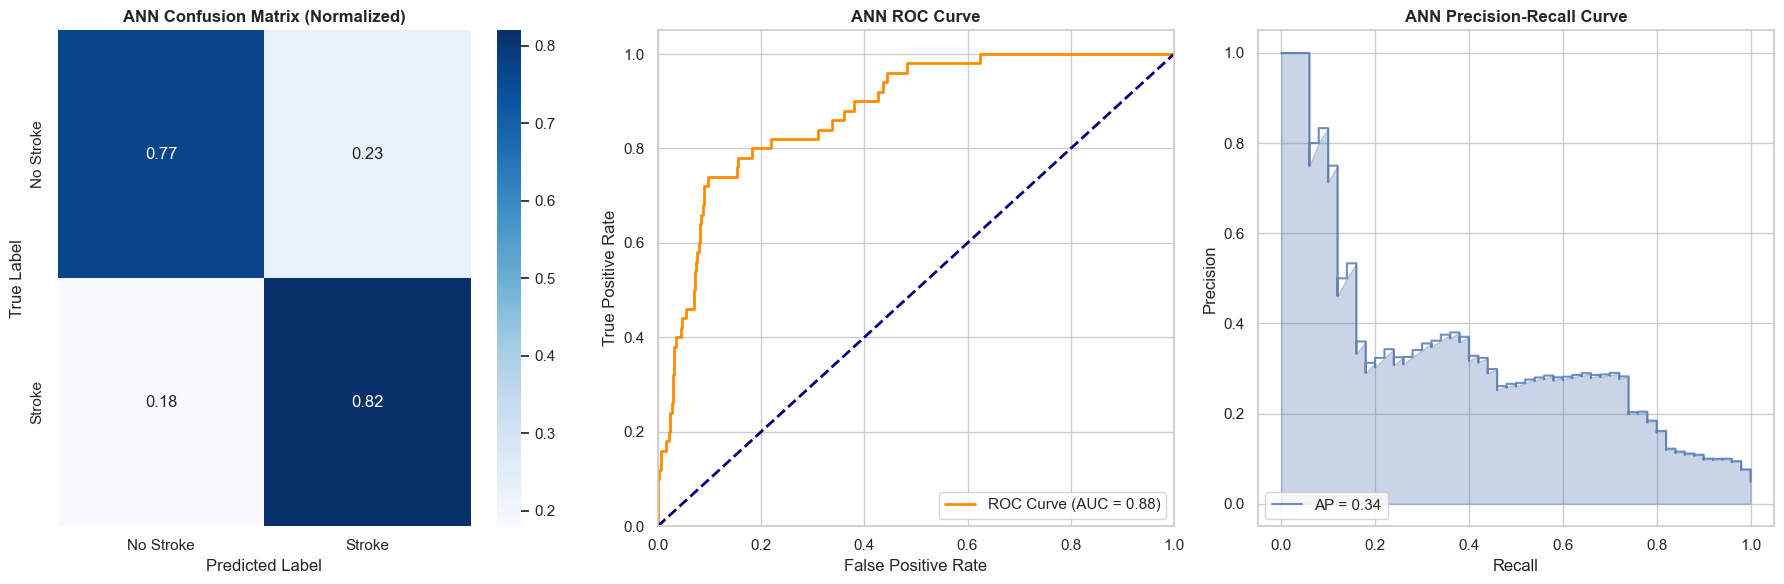

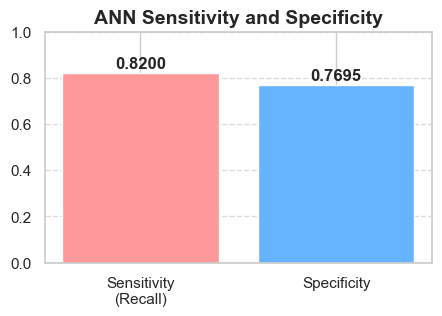

In [22]:
MODEL_PATH = os.path.join(BASE_DIR, 'stroke-prediction-project', 'src', 'models', 'ann_model.pkl')

# Load model:
model = joblib.load(MODEL_PATH)
model_name = os.path.basename(MODEL_PATH).split("_")[0].upper()

# Validation evaluation:
print_header(f"{model_name} VALIDATION PERFORMANCE")

y_val_pred = model.predict(X_valid)
y_val_proba = model.predict_proba(X_valid)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_valid)

val_accuracy = accuracy_score(y_valid, y_val_pred)
val_roc_auc = roc_auc_score(y_valid, y_val_proba)
val_avg_precision = average_precision_score(y_valid, y_val_proba)
val_precision = precision_score(y_valid, y_val_pred)
val_recall = recall_score(y_valid, y_val_pred)
val_f1 = f1_score(y_valid, y_val_pred)
val_sens, val_spec = calc_sens_spec(y_valid, y_val_pred)

print(f"Validation Accuracy: {val_accuracy:.4f}")
print(f"Validation ROC AUC: {val_roc_auc:.4f}")
print(f"Validation Avg Precision: {val_avg_precision:.4f}")
print(f"Precision: {val_precision:.4f}")
print(f"Recall (Sensitivity): {val_recall:.4f}")
print(f"Specificity: {val_spec:.4f}")
print(f"F1 Score: {val_f1:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_valid, y_val_pred, target_names=["No Stroke", "Stroke"]))

# Test Evaluation:
print_header(f"{model_name} MODEL PERFORMANCE ON TEST SET")

y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)
avg_precision = average_precision_score(y_test, y_proba)
sensitivity, specificity = calc_sens_spec(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")
print(f"Average Precision Score: {avg_precision:.4f}")
print("\nDetailed Classification Report:")
print(classification_report(y_test, y_pred, target_names=["No Stroke", "Stroke"]))


plt.figure(figsize=(18, 6))

# Confusion Matrix - Normalized
plt.subplot(131)
cm_norm = confusion_matrix(y_test, y_pred, normalize='true')
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=['No Stroke', 'Stroke'],
            yticklabels=['No Stroke', 'Stroke'])
plt.title(f'{model_name} Confusion Matrix (Normalized)', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# ROC Curve
plt.subplot(132)
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'{model_name} ROC Curve', fontsize=12, fontweight='bold')
plt.legend(loc="lower right")

# PR Curve
plt.subplot(133)
precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
plt.step(recall_curve, precision_curve, color='b', alpha=0.8, where='post', label=f'AP = {avg_precision:.2f}')
plt.fill_between(recall_curve, precision_curve, alpha=0.3, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title(f'{model_name} Precision-Recall Curve', fontsize=12, fontweight='bold')
plt.legend(loc="lower left")

plt.tight_layout()
overview_path = os.path.join(REPORT_DIR, f'{model_name.lower()}_performance_overview.png')
plt.savefig(overview_path, dpi=300)
print(f"\nPerformance visualization saved to:\n   {overview_path}")

# === SENSITIVITY & SPECIFICITY BAR PLOT ===
plt.figure(figsize=(5, 3))
metrics = ['Sensitivity\n(Recall)', 'Specificity']
values = [sensitivity, specificity]
colors = ['#ff9999', '#66b3ff']

plt.bar(metrics, values, color=colors)
plt.ylim(0, 1.0)
plt.title(f'{model_name} Sensitivity and Specificity', fontsize=14, fontweight='bold')
plt.grid(axis='y', linestyle='--', alpha=0.7)
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')

sens_spec_path = os.path.join(REPORT_DIR, f'{model_name.lower()}_sensitivity_specificity.png')
plt.savefig(sens_spec_path, dpi=300)
print(f"Sensitivity and Specificity visualization saved to:\n   {sens_spec_path}")

*Fitting 6 folds for each of 18 candidates, totalling 108 fits.*  
**ANN - Best Parameters:** {'ann__learning_rate': 'adaptive', 'ann__hidden_layer_sizes': (100,), 'ann__alpha': 0.01,  'ann__activation': 'relu'}  
**ANN - Best f1 Score:** 0.2336  
*Training completed in 15.64 seconds*  
Total execution time: 16.28 seconds

# ***Now Comparing how the models fair against each other....***

In [24]:
import pandas as pd

# Compiled test performance from your logs
model_metrics = pd.DataFrame({
    'Model': ['KNN', 'GNB', 'SVM', 'ANN', 'Logistic Regression', 'Decision Tree'],
    'Accuracy': [0.8474, 0.7671, 0.7867, 0.7720, 0.7476, 0.8865],
    'F1 Score': [0.3710, 0.2468, 0.2685, 0.2603, 0.2412, 0.3483],
    'ROC AUC': [0.9561, 0.8219, 0.8745, 0.8772, 0.8478, 0.9111],
    'Precision': [0.2323, 0.1466, 0.1613, 0.1547, 0.1414, 0.2422],
    'Recall': [0.9200, 0.7800, 0.8000, 0.8200, 0.8200, 0.6200],
    'Specificity': [0.8436, 0.7665, 0.7860, 0.7695, 0.7438, 0.9002],
    'Avg Precision': [0.6635, 0.1903, 0.3042, 0.3428, 0.2558, 0.3527]
})

model_metrics.set_index('Model', inplace=True)
display(model_metrics.round(4))



,Accuracy,F1 Score,ROC AUC,Precision,Recall,Specificity,Avg Precision
Model,,,,,,,
KNN,0.8474,0.3710,0.9561,0.2323,0.92,0.8436,0.6635
GNB,0.7671,0.2468,0.8219,0.1466,0.78,0.7665,0.1903
SVM,0.7867,0.2685,0.8745,0.1613,0.80,0.7860,0.3042
ANN,0.7720,0.2603,0.8772,0.1547,0.82,0.7695,0.3428
Logistic Regression,0.7476,0.2412,0.8478,0.1414,0.82,0.7438,0.2558
Decision Tree,0.8865,0.3483,0.9111,0.2422,0.62,0.9002,0.3527


/var/folders/2s/959hxcwj6w5fcykv3xt79td40000gn/T/ipykernel_47118/4092916446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_metrics.index, y=model_metrics[metric], palette='crest')  # <-- direct Series


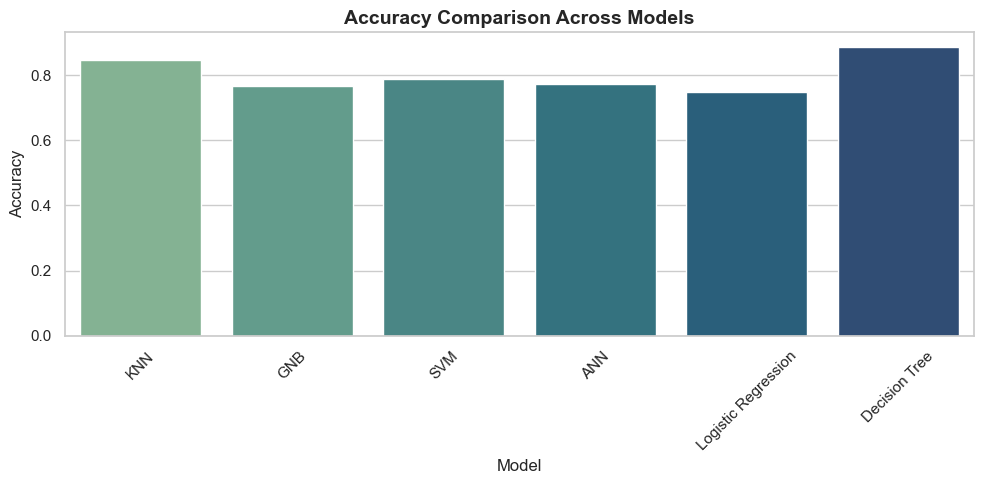

/var/folders/2s/959hxcwj6w5fcykv3xt79td40000gn/T/ipykernel_47118/4092916446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_metrics.index, y=model_metrics[metric], palette='crest')  # <-- direct Series


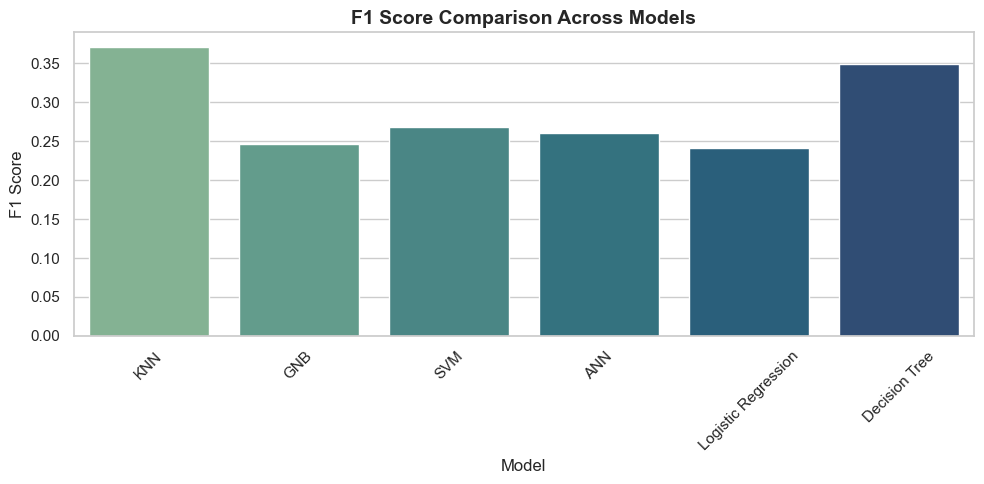

/var/folders/2s/959hxcwj6w5fcykv3xt79td40000gn/T/ipykernel_47118/4092916446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_metrics.index, y=model_metrics[metric], palette='crest')  # <-- direct Series


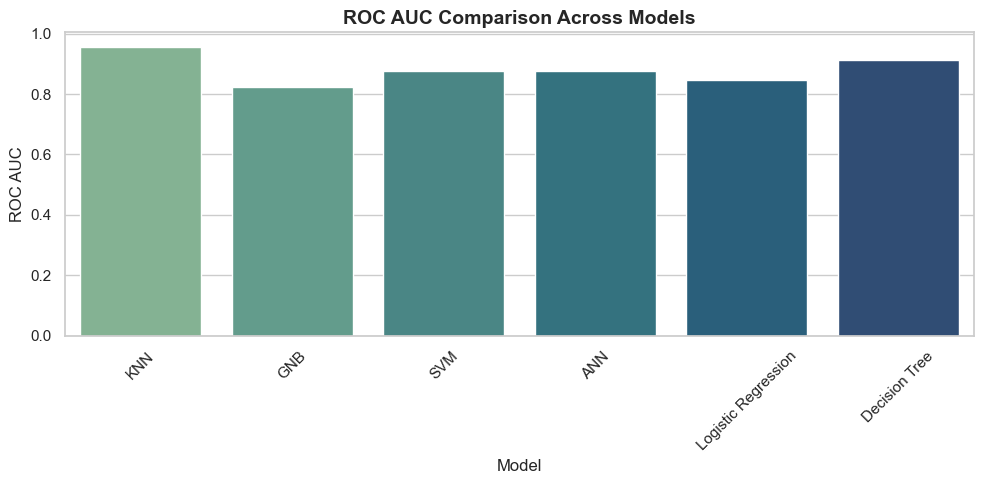

/var/folders/2s/959hxcwj6w5fcykv3xt79td40000gn/T/ipykernel_47118/4092916446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_metrics.index, y=model_metrics[metric], palette='crest')  # <-- direct Series


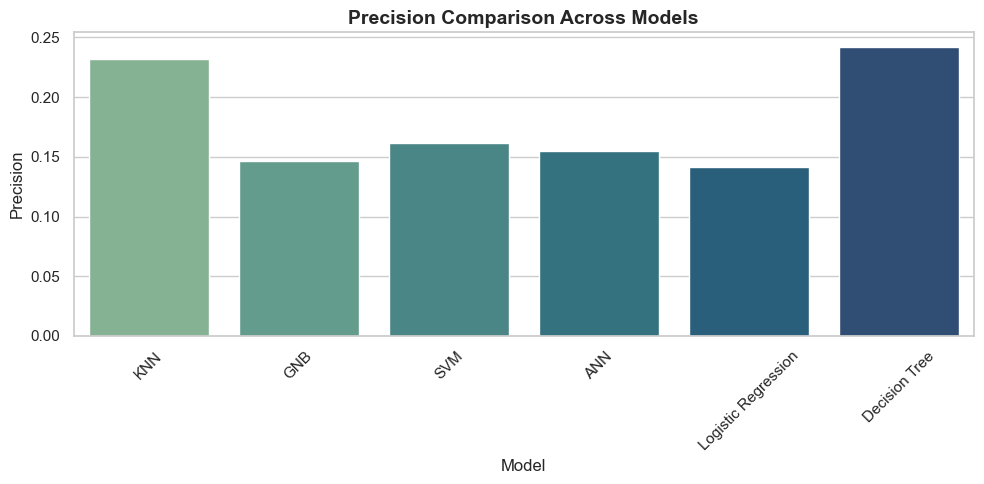

/var/folders/2s/959hxcwj6w5fcykv3xt79td40000gn/T/ipykernel_47118/4092916446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_metrics.index, y=model_metrics[metric], palette='crest')  # <-- direct Series


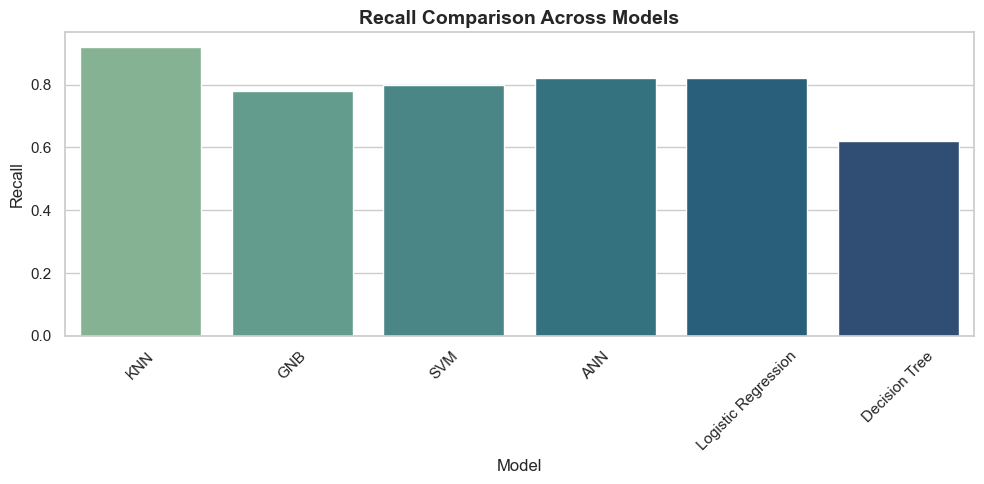

/var/folders/2s/959hxcwj6w5fcykv3xt79td40000gn/T/ipykernel_47118/4092916446.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_metrics.index, y=model_metrics[metric], palette='crest')  # <-- direct Series


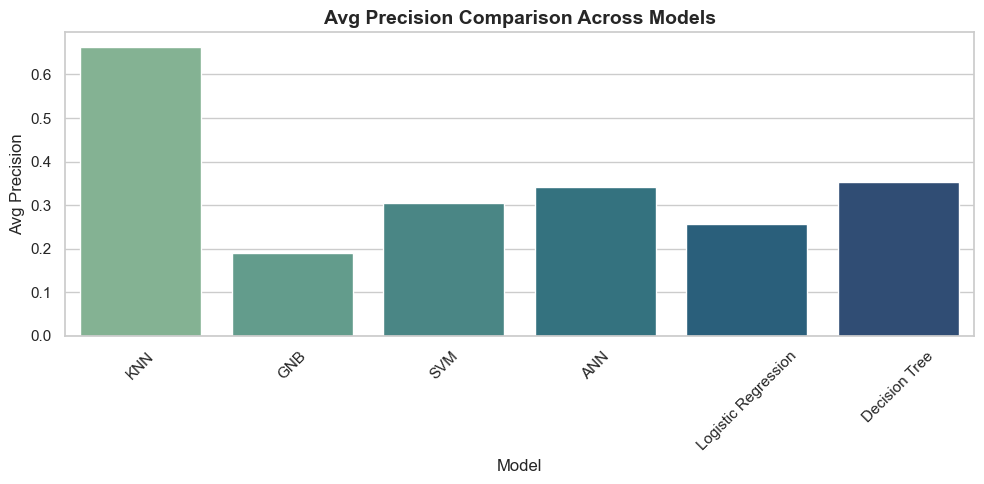

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_bar(metric):
    plt.figure(figsize=(10, 5))
    sns.barplot(x=model_metrics.index, y=model_metrics[metric], palette='crest')  # <-- direct Series
    plt.title(f'{metric} Comparison Across Models', fontsize=14, weight='bold')
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# Loop through key metrics
for m in ['Accuracy', 'F1 Score', 'ROC AUC', 'Precision', 'Recall', 'Avg Precision']:
    plot_bar(m)


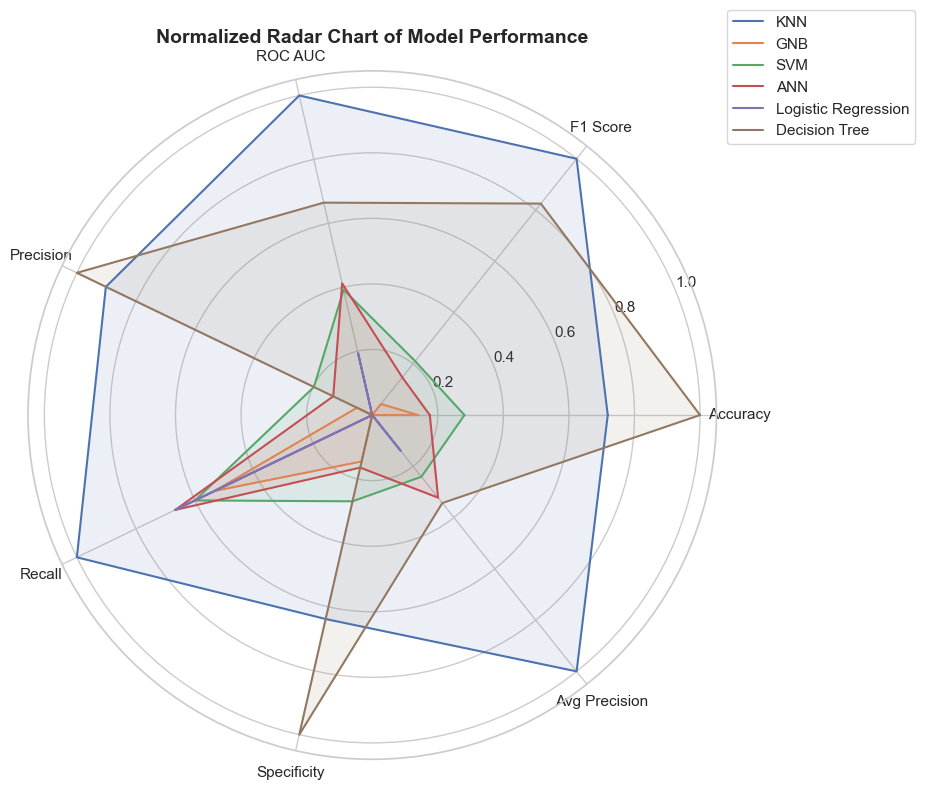

In [27]:
from math import pi

radar_df = (model_metrics - model_metrics.min()) / (model_metrics.max() - model_metrics.min())
categories = radar_df.columns.tolist()
N = len(categories)

plt.figure(figsize=(9, 8))

for model in radar_df.index:
    values = radar_df.loc[model].tolist()
    values += values[:1]  # close the loop
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    plt.polar(angles, values, label=model)
    plt.fill(angles, values, alpha=0.1)

plt.xticks([n / float(N) * 2 * pi for n in range(N)], categories)
plt.title('Normalized Radar Chart of Model Performance', size=14, weight='bold', pad=20)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()
